# 赛题任务
参赛者需要对我们提供的新闻数据进行情感极性分类，其中正面情绪对应0，中性情绪对应1以及负面情绪对应2。
根据我们提供的训练数据，通过您的算法或模型判断出测试集中新闻的情感极性。

In [2]:
import pandas as pd

In [3]:
Train_DataSet = pd.read_csv('../dataset/Train_DataSet.csv')
Train_DataSet.head()

,id,title,content
0,7a3dd79f90ee419da87190cff60f7a86,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),这几天看了有人举报施某某的贴子，经与举报人联系证实，是宣某当天中午请举报人和枪手喝酒后，晚上...
1,7640a5589bc7486ca199eeeb38af79dd,江歌事件:教会孩子，善良的同时更要懂得保护自己!,过去一年的江歌悲剧，这几日再次刷屏：住在东京都中野区的中国女留学生江歌，收留了被前男友陈世锋...
2,8c5bda93e4ba401f90a0faa5b28fe57f,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",“双11”1600亿的销售额让中国乃至全世界感到震惊，为此，不仅有不惜欠债百万的“剁手党”，...
3,1aa777fed31a4b8a9d866f05b5477557,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,2016年以来，如东高新区一家叫做拜瑞生物医药的企业竟然将装废水的槽罐车伪装成洒水车，常年在...
4,6c67ac55360340258e157f3710ebae6c,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,新闻资讯•民生热点•城市生活•南通人都在看浏览更多资讯请关注微信公众号:南通传媒网昨晚央视一...


In [43]:
Train_DataSet.describe()

,id,title,content
count,7345,7342,7266
unique,7345,7210,7118
top,40e18d63856c4f5bb6a9886cec227c61,看黄播了兄弟不穿衣服那种,特别声明：以上文章内容仅代表作者本人观点，不代表新浪看点观点或立场。如有关于作品内容、版权或...
freq,1,5,8


In [42]:
Train_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7345 entries, 0 to 7344
Data columns (total 3 columns):
id         7345 non-null object
title      7342 non-null object
content    7266 non-null object
dtypes: object(3)
memory usage: 172.3+ KB


In [4]:
Train_DataSet_Label = pd.read_csv('../dataset/Train_DataSet_Label.csv')
Train_DataSet_Label.head()

,id,label
0,7a3dd79f90ee419da87190cff60f7a86,2
1,7640a5589bc7486ca199eeeb38af79dd,1
2,8c5bda93e4ba401f90a0faa5b28fe57f,2
3,1aa777fed31a4b8a9d866f05b5477557,2
4,6c67ac55360340258e157f3710ebae6c,2


In [49]:
Train_DataSet_Label.describe()

,label
count,7355.000000
mean,1.294765
std,0.644736
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [5]:
#join表
data = pd.merge(Train_DataSet,Train_DataSet_Label,on=['id','id'])
data.head()

,id,title,content,label
0,7a3dd79f90ee419da87190cff60f7a86,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),这几天看了有人举报施某某的贴子，经与举报人联系证实，是宣某当天中午请举报人和枪手喝酒后，晚上...,2
1,7640a5589bc7486ca199eeeb38af79dd,江歌事件:教会孩子，善良的同时更要懂得保护自己!,过去一年的江歌悲剧，这几日再次刷屏：住在东京都中野区的中国女留学生江歌，收留了被前男友陈世锋...,1
2,8c5bda93e4ba401f90a0faa5b28fe57f,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",“双11”1600亿的销售额让中国乃至全世界感到震惊，为此，不仅有不惜欠债百万的“剁手党”，...,2
3,1aa777fed31a4b8a9d866f05b5477557,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,2016年以来，如东高新区一家叫做拜瑞生物医药的企业竟然将装废水的槽罐车伪装成洒水车，常年在...,2
4,6c67ac55360340258e157f3710ebae6c,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,新闻资讯•民生热点•城市生活•南通人都在看浏览更多资讯请关注微信公众号:南通传媒网昨晚央视一...,2


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340 entries, 0 to 7339
Data columns (total 4 columns):
id         7340 non-null object
title      7339 non-null object
content    7266 non-null object
label      7340 non-null int64
dtypes: int64(1), object(3)
memory usage: 286.7+ KB


In [ ]:
#data.to_csv("../output/data.csv")

In [6]:

labels = data.groupby('label')['label'].count()
labels

label
0     763
1    3646
2    2931
Name: label, dtype: int64

<IPython.core.display.Javascript object>


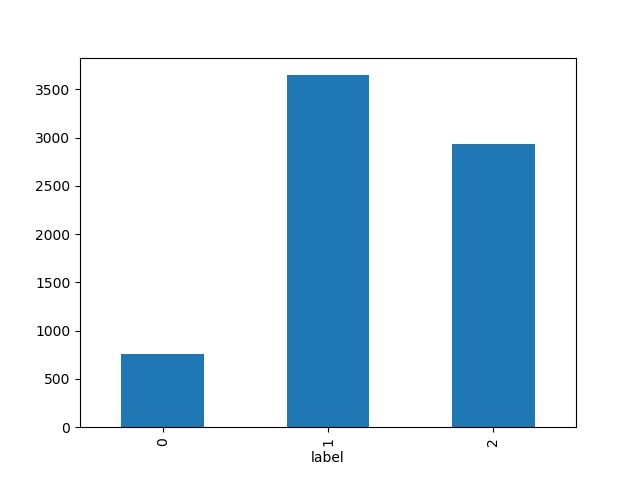

In [16]:

import matplotlib.pyplot as plt
%matplotlib notebook
labels.plot(kind='bar')

plt.show()

In [7]:
data['sentence'] = data['title'] 

In [18]:
data['label2'] = data['label'].map(lambda x: (x==0 and '正面') or (x==1 and '中性') or (x==2 and '负面'))
#data['label'].where(data['label'] ==1 ,'中').where(data['label'] ==0 ,'正').where(data['label'] ==2 ,'负')
data

,id,title,content,label,sentence,label2
0,7a3dd79f90ee419da87190cff60f7a86,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),这几天看了有人举报施某某的贴子，经与举报人联系证实，是宣某当天中午请举报人和枪手喝酒后，晚上...,2,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),负面
1,7640a5589bc7486ca199eeeb38af79dd,江歌事件:教会孩子，善良的同时更要懂得保护自己!,过去一年的江歌悲剧，这几日再次刷屏：住在东京都中野区的中国女留学生江歌，收留了被前男友陈世锋...,1,江歌事件:教会孩子，善良的同时更要懂得保护自己!,中性
2,8c5bda93e4ba401f90a0faa5b28fe57f,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",“双11”1600亿的销售额让中国乃至全世界感到震惊，为此，不仅有不惜欠债百万的“剁手党”，...,2,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",负面
3,1aa777fed31a4b8a9d866f05b5477557,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,2016年以来，如东高新区一家叫做拜瑞生物医药的企业竟然将装废水的槽罐车伪装成洒水车，常年在...,2,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,负面
4,6c67ac55360340258e157f3710ebae6c,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,新闻资讯•民生热点•城市生活•南通人都在看浏览更多资讯请关注微信公众号:南通传媒网昨晚央视一...,2,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,负面
5,4760de6f94e249cd8d8cd5634fd8dc5a,央视曝光!南通一医药企业夜间偷排高浓度废水...丢脸!,昨晚央视一套晚间新闻栏目曝光了一则新闻报道的对象竟是如东一家企业的事情▽2016年以来，南通...,2,央视曝光!南通一医药企业夜间偷排高浓度废水...丢脸!,负面
6,8c35b37b2a8a4884b3b8071b879e6fa6,粉丝爆料:五洲国际无锡项目涉嫌诈骗、非法集资,随着金融街1号（jinrongjieyihao）对有非法集资、诈骗嫌疑的案例的曝光，粉丝们的...,2,粉丝爆料:五洲国际无锡项目涉嫌诈骗、非法集资,负面
7,3b27c107b5134e9dabda161b4fb2c353,年内约10起锂电重组失败 资本对高估值收购说“不”,摘要来自中国电池联盟的数据显示，今年以来，国内动力电池产业链投资额已接近千亿元，相关兼并购案...,1,年内约10起锂电重组失败 资本对高估值收购说“不”,中性
8,167c5e0e39164b5fad96391422cc166d,男子梦想一夜暴富持水泥块砸机,一分钱都没取到 近日，江苏扬州，谢某为盗取钱款手持水泥块疯砸机。由于机自带防盗功能，谢某未...,2,男子梦想一夜暴富持水泥块砸机,负面
9,51d757b893294b2693ddd16d94356d2d,北京多家法院供暖纠纷:案件主体为供暖费追缴山海网,北京的这个冬天来得比往年更早一些，大风寒潮一次次刷新着温度的新低。冬季采暖直接关系着居民的...,2,北京多家法院供暖纠纷:案件主体为供暖费追缴山海网,负面


In [19]:
data['label3'] = data['label'].map(lambda x: (x==0 and '情感') or (x==2  and '情感') or (x==1 and '非情感'))
data

,id,title,content,label,sentence,label2,label3
0,7a3dd79f90ee419da87190cff60f7a86,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),这几天看了有人举报施某某的贴子，经与举报人联系证实，是宣某当天中午请举报人和枪手喝酒后，晚上...,2,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),负面,情感
1,7640a5589bc7486ca199eeeb38af79dd,江歌事件:教会孩子，善良的同时更要懂得保护自己!,过去一年的江歌悲剧，这几日再次刷屏：住在东京都中野区的中国女留学生江歌，收留了被前男友陈世锋...,1,江歌事件:教会孩子，善良的同时更要懂得保护自己!,中性,非情感
2,8c5bda93e4ba401f90a0faa5b28fe57f,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",“双11”1600亿的销售额让中国乃至全世界感到震惊，为此，不仅有不惜欠债百万的“剁手党”，...,2,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",负面,情感
3,1aa777fed31a4b8a9d866f05b5477557,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,2016年以来，如东高新区一家叫做拜瑞生物医药的企业竟然将装废水的槽罐车伪装成洒水车，常年在...,2,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,负面,情感
4,6c67ac55360340258e157f3710ebae6c,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,新闻资讯•民生热点•城市生活•南通人都在看浏览更多资讯请关注微信公众号:南通传媒网昨晚央视一...,2,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,负面,情感
5,4760de6f94e249cd8d8cd5634fd8dc5a,央视曝光!南通一医药企业夜间偷排高浓度废水...丢脸!,昨晚央视一套晚间新闻栏目曝光了一则新闻报道的对象竟是如东一家企业的事情▽2016年以来，南通...,2,央视曝光!南通一医药企业夜间偷排高浓度废水...丢脸!,负面,情感
6,8c35b37b2a8a4884b3b8071b879e6fa6,粉丝爆料:五洲国际无锡项目涉嫌诈骗、非法集资,随着金融街1号（jinrongjieyihao）对有非法集资、诈骗嫌疑的案例的曝光，粉丝们的...,2,粉丝爆料:五洲国际无锡项目涉嫌诈骗、非法集资,负面,情感
7,3b27c107b5134e9dabda161b4fb2c353,年内约10起锂电重组失败 资本对高估值收购说“不”,摘要来自中国电池联盟的数据显示，今年以来，国内动力电池产业链投资额已接近千亿元，相关兼并购案...,1,年内约10起锂电重组失败 资本对高估值收购说“不”,中性,非情感
8,167c5e0e39164b5fad96391422cc166d,男子梦想一夜暴富持水泥块砸机,一分钱都没取到 近日，江苏扬州，谢某为盗取钱款手持水泥块疯砸机。由于机自带防盗功能，谢某未...,2,男子梦想一夜暴富持水泥块砸机,负面,情感
9,51d757b893294b2693ddd16d94356d2d,北京多家法院供暖纠纷:案件主体为供暖费追缴山海网,北京的这个冬天来得比往年更早一些，大风寒潮一次次刷新着温度的新低。冬季采暖直接关系着居民的...,2,北京多家法院供暖纠纷:案件主体为供暖费追缴山海网,负面,情感


<IPython.core.display.Javascript object>


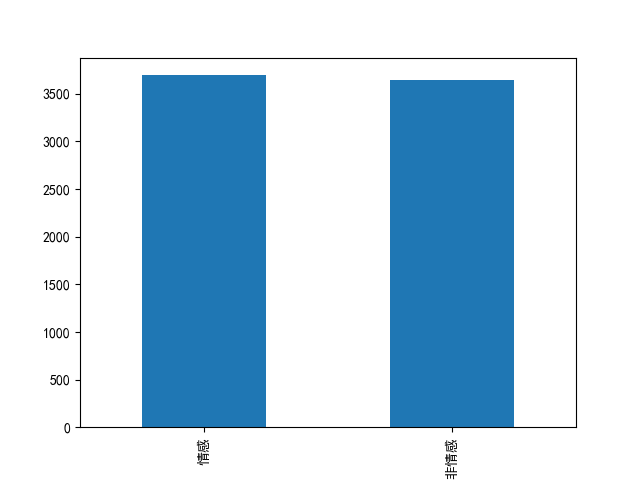

In [21]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
labels = data.groupby('label3')['label3'].count()
import matplotlib.pyplot as plt
%matplotlib notebook
labels.plot(kind='bar')

plt.show()

In [22]:
data['label4'] = data['label'].map(lambda x: (x==0 and '0') or (x==2  and '0') or (x==1 and '1'))
data

,id,title,content,label,sentence,label2,label3,label4
0,7a3dd79f90ee419da87190cff60f7a86,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),这几天看了有人举报施某某的贴子，经与举报人联系证实，是宣某当天中午请举报人和枪手喝酒后，晚上...,2,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),负面,情感,0
1,7640a5589bc7486ca199eeeb38af79dd,江歌事件:教会孩子，善良的同时更要懂得保护自己!,过去一年的江歌悲剧，这几日再次刷屏：住在东京都中野区的中国女留学生江歌，收留了被前男友陈世锋...,1,江歌事件:教会孩子，善良的同时更要懂得保护自己!,中性,非情感,1
2,8c5bda93e4ba401f90a0faa5b28fe57f,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",“双11”1600亿的销售额让中国乃至全世界感到震惊，为此，不仅有不惜欠债百万的“剁手党”，...,2,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",负面,情感,0
3,1aa777fed31a4b8a9d866f05b5477557,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,2016年以来，如东高新区一家叫做拜瑞生物医药的企业竟然将装废水的槽罐车伪装成洒水车，常年在...,2,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,负面,情感,0
4,6c67ac55360340258e157f3710ebae6c,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,新闻资讯•民生热点•城市生活•南通人都在看浏览更多资讯请关注微信公众号:南通传媒网昨晚央视一...,2,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,负面,情感,0
5,4760de6f94e249cd8d8cd5634fd8dc5a,央视曝光!南通一医药企业夜间偷排高浓度废水...丢脸!,昨晚央视一套晚间新闻栏目曝光了一则新闻报道的对象竟是如东一家企业的事情▽2016年以来，南通...,2,央视曝光!南通一医药企业夜间偷排高浓度废水...丢脸!,负面,情感,0
6,8c35b37b2a8a4884b3b8071b879e6fa6,粉丝爆料:五洲国际无锡项目涉嫌诈骗、非法集资,随着金融街1号（jinrongjieyihao）对有非法集资、诈骗嫌疑的案例的曝光，粉丝们的...,2,粉丝爆料:五洲国际无锡项目涉嫌诈骗、非法集资,负面,情感,0
7,3b27c107b5134e9dabda161b4fb2c353,年内约10起锂电重组失败 资本对高估值收购说“不”,摘要来自中国电池联盟的数据显示，今年以来，国内动力电池产业链投资额已接近千亿元，相关兼并购案...,1,年内约10起锂电重组失败 资本对高估值收购说“不”,中性,非情感,1
8,167c5e0e39164b5fad96391422cc166d,男子梦想一夜暴富持水泥块砸机,一分钱都没取到 近日，江苏扬州，谢某为盗取钱款手持水泥块疯砸机。由于机自带防盗功能，谢某未...,2,男子梦想一夜暴富持水泥块砸机,负面,情感,0
9,51d757b893294b2693ddd16d94356d2d,北京多家法院供暖纠纷:案件主体为供暖费追缴山海网,北京的这个冬天来得比往年更早一些，大风寒潮一次次刷新着温度的新低。冬季采暖直接关系着居民的...,2,北京多家法院供暖纠纷:案件主体为供暖费追缴山海网,负面,情感,0


In [24]:
train_data = data[['sentence','label4']]
train_data.head()

,sentence,label4
0,问责领导(上黄镇党委书记张涛，宣国才真能一手遮天吗？),0
1,江歌事件:教会孩子，善良的同时更要懂得保护自己!,1
2,"绝味鸭脖广告""开黄腔""引众怒 ""双11""这么拼值吗?",0
3,央视曝光!如东一医药企业将槽罐车改成垃圾车，夜间偷排高浓度废水,0
4,恶劣至极，央视都曝光了!南通如东一医药企业将槽罐车改成洒水车，夜间偷排高浓度废水...丢大发了!,0


In [25]:
#导出cvs ，utf8编码，不需要行索引，分隔符为\t
train_data.to_csv("../output/train_data.csv",encoding='utf8',index=0,sep='\t')

In [26]:
data[data['label'] == 0].shape,data[data['label'] == 2].shape

((763, 8), (2931, 8))

In [27]:
len(data[data['label'] == 0]),len(data[data['label'] ==2])

(763, 2931)

In [28]:
#正面数据翻4倍
pos_data_0 = data[data['label'] == 0]
pos_data = pd.concat([pos_data_0,pos_data_0,pos_data_0,pos_data_0],ignore_index=True)

In [29]:
pos_data.shape

(3052, 8)

In [30]:
neg_data = data[data['label'] ==2]

In [31]:
neg_data.shape

(2931, 8)

In [32]:
data_pos_neg = pd.concat([pos_data,neg_data])
data_pos_neg = data_pos_neg[['sentence','label']]
data_pos_neg.head()

,sentence,label
0,太仓立案查处42起药械违法行为 保障百姓用药安全,0
1,汉阴警方为十余名受害农民工发放被追回的欠薪款近25万元,0
2,汉阴警方为十余名受害农民工发放被追回的欠薪款近25万元,0
3,打印_公诉人反复对被告人进行思想教育 追回赃款7100多万_沭阳网,0
4,靖远县城区一违法建筑被强制拆除,0


In [ ]:
data_pos_neg.groupby('label').count()

In [33]:
from sklearn.utils import shuffle
data_pos_neg = shuffle(data_pos_neg)

In [34]:
data_pos_neg['label'] = data_pos_neg['label'].map(lambda x: (x==0 and '0') or (x==2  and '1'))

In [35]:
data_pos_neg.to_csv('../output/data_pos_neg.csv', encoding='utf8',sep='\t',index=False)

In [36]:
data_pos_neg.groupby('label').count()

,sentence
label,
0,3052
1,2931


In [37]:
import numpy as np
np.ones(10),np.ones(10).reshape(1,10),np.ones(10).shape,np.ones(10).reshape(1,10).shape

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 (10,),
 (1, 10))

In [ ]:
#pd.read_csv('../output/final.csv',sep='\t')[['id','label']].to_csv('f.csv',sep=',',encoding='utf8',index=False)